In [1]:
# 2023.5.1
# reconstructed code 

# total random init
# poly function

In [2]:
import os

cuda_device = '2'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train


In [3]:
import torch.multiprocessing as mp
num_processes = 10



width_vector = [80, 160, 320]

result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 0
    
            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        

        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()
            result_matrix[i, idx, :] = [error, error_infty]


    i += 1


    

Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!
Hallelujah!


In [4]:
print(result_matrix)

[[[1.02714421e-02 3.99584055e-01]
  [1.02097203e-03 7.03244060e-02]
  [5.80518041e-03 2.11180449e-01]
  [1.20930094e-02 3.41371119e-01]
  [1.18621653e-02 3.82067978e-01]
  [7.48531427e-04 6.10599518e-02]
  [1.73846334e-02 5.15398145e-01]
  [5.80532756e-03 2.89212346e-01]
  [5.25980350e-03 1.04635000e-01]
  [2.91849184e-03 1.60331130e-01]]

 [[3.10557964e-03 2.03934729e-01]
  [2.85200193e-03 1.51264787e-01]
  [5.90628129e-04 6.13051653e-02]
  [1.72403408e-03 1.27041519e-01]
  [1.19850528e-03 8.83239508e-02]
  [3.38259363e-03 1.49798453e-01]
  [3.37391091e-03 2.16094792e-01]
  [4.47258772e-03 2.01174319e-01]
  [8.48431420e-03 4.43624198e-01]
  [3.85287008e-03 2.07882941e-01]]

 [[8.33742612e-04 8.11088681e-02]
  [1.08461990e-03 8.69552493e-02]
  [1.00466004e-03 9.52864289e-02]
  [9.46892600e-04 1.16565228e-01]
  [4.25718608e-04 4.43626642e-02]
  [7.80305301e-04 9.28897858e-02]
  [2.29648009e-04 4.88178134e-02]
  [1.91704289e-03 1.82383537e-01]
  [2.02998123e-03 1.97691321e-01]
  [9.85859

(3, 10, 2)
0.20288719206900652
<class 'numpy.ndarray'>
0.0
[0.00501821 0.00266449 0.00087117]
[0.20288719 0.16237937 0.09589206]
y_min: [0.00074853 0.00059063 0.00022965]
y_max: [0.01738463 0.00848431 0.00202998]
[[0.00426968 0.00207386 0.00064152]
 [0.01236642 0.00581983 0.00115881]]


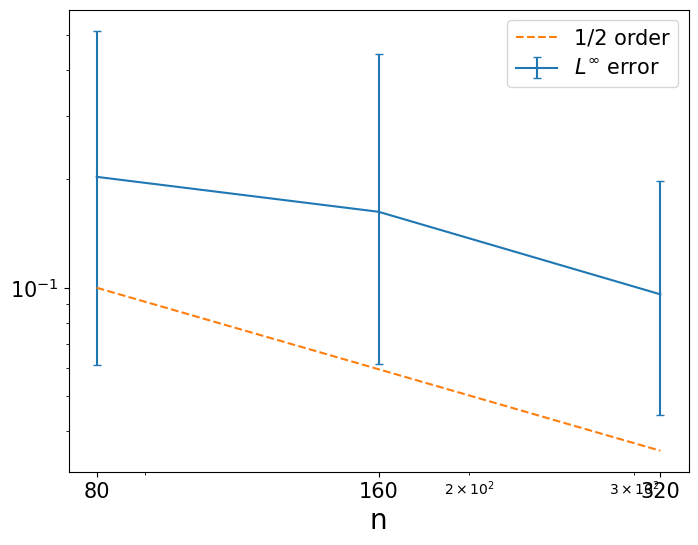

In [5]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))



mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])



print(mean)
print(mean_inf)


y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]


ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()